### Training a Random Forest Regressor

In this step, I am going to train a random forest regressorm using the pipeline described on One_hot_encoding.ipynb. First, I am going to one hot encode the features in the same manner as before. I am going to proceed with the same example as before.

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

#Loading the dataframe from the previous notebook
df = pd.read_csv('test.csv',index_col=0)

# Converting the string representation of the list to a list
df['Features'] = df['Features'].apply(lambda x: ast.literal_eval(x))
df

,Target,Features
Genes,,
Gene_1,1.717405,[TTCTCAAATACCCCTATTCTCAAATACCCCTATTCTCAAATATCC...
Gene_2,4.481926,[CCTCAATTCTCAAATACTCCTATTCTCAAATACCCCTAATCTCAA...
Gene_3,3.121352,[CAAATACCCTTTTATTCTCAAATACCTCTATTCTCTAATACCCAT...
Gene_4,0.739333,[AATACCCCTATTCTCAAATACCCCTATTCTCTAATACCCCTATTC...
Gene_5,2.347276,[AATACCCCTATTCTCAAATACCCCTATTCTCTAATACCCCTATTC...
Gene_6,5.212245,[CCCCTATTCTCAAATACCCTTTTATTCTCAAATACCCCTATTCTC...
Gene_7,0.262397,[CCTCTATTCTCTAATACCCATTCTCAAATACCATTTTATTCTCAA...
Gene_8,1.883738,[TTCAAATACCCCTATTCTCTAATACCCTTATTCTCAAATACCCCT...
Gene_9,3.030171,[CTCAAATACTCCTATTCTCAAATACCCCTATTCTCAAATACCCTT...


Next, we one hot encode it using the same functions as the other notebook.

In [8]:
# Functions from the other nothebook

def one_hot_encoding(features, all_features):
    one_hot = []
    for feature in all_features:
        if feature in features:
            one_hot.append(1)
        else:
            one_hot.append(0)
    return one_hot

def create_one_hot_encoding(df):

    '''
    This function takes a dataframe with a column named "Features" and creates a one hot encoding of the features.
    
    Parameters
    ----------
    df : pandas.DataFrame
    Dataframe with a column named "Features" that contains a list of features and a column named "Genes" that contains the gene names.
    Dataframe should also contain column called "Target" that contains the target.


        
    Returns
    ------- 
    df_one_hot : pandas.DataFrame
    Dataframe with one hot encoded features.
    
    '''
  
    #Preprocessing step

    # Making a list of all the features
    lists_of_features = df["Features"].values.flatten().tolist()

    # Nested list comprehension to create a single flattened list
    flattened_list = [item for sublist in lists_of_features for item in sublist]

    #making a set of the flattened lists features (removing duplicates)
    all_features = list(set(flattened_list))

    #  Creating one hot encoding dataframe keeping the same Gene names as index and the Target
    df_one_hot = pd.DataFrame(index=df.index)

    # Create columns names
    features_names = ["feature_" + str(i+1) for i in range(len(all_features))]

    # Add 100 columns with the names from the list to the DataFrame
    for col in features_names:
        df_one_hot[col] = ""

    # Adding one hot encoded features to the data frame
    for i,gene in enumerate(df.index):
        df_one_hot.loc[gene] = one_hot_encoding(df["Features"].values[i], all_features)

    #Adding the target from df
    df_one_hot.insert(0,"Target" , df["Target"])

    return df_one_hot

# Creating one hot encoding dataframe
lists_of_features = df["Features"].values.flatten().tolist()

# Nested list comprehension to create a single flattened list
flattened_list = [item for sublist in lists_of_features for item in sublist]

#making a set of the flattened lists features (removing duplicates)
all_features = list(set(flattened_list))

    #  Creating one hot encoding dataframe keeping the same Gene names as index and the Target
df_one_hot = pd.DataFrame(index=df.index)
df["Features"].values[0]

df_one_hot = create_one_hot_encoding(df)
display(df_one_hot)

,Target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70
Genes,,,,,,,,,,,,,,,,,,,,,
Gene_1,1.717405,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
Gene_2,4.481926,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
Gene_3,3.121352,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Gene_4,0.739333,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
Gene_5,2.347276,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
Gene_6,5.212245,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
Gene_7,0.262397,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Gene_8,1.883738,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
Gene_9,3.030171,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With the features and our target, we should be able to train a random forest. Before the training, I will make functions to perform cross-validation (CV) to evaluate our models.

In [36]:
#Import CV Packages
from sklearn.model_selection import KFold

# RMSE function for two arrays
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

# Function that performs the cross validation
def run_cv(n_folds, model, X_train, y_train):
    """
    Args:
        n_folds (int) : how many folds of CV to do
        model (sklearn Model) : what model do we want to fit
        X_train (np.array) : feature matrix
        y_train (np.array) : target array
        
    Returns:
        a dictionary with scores from each fold for training and validation
            {'train' : [list of training scores],
             'val' : [list of validation scores]}
            - the length of each list = n_folds
    """
    
    folds = KFold(n_splits=n_folds).split(X_train, y_train)

    train_scores, val_scores = [], []
    for k, (train, val) in enumerate(folds):
        
        X_train_cv = X_train[train]
        y_train_cv = y_train[train]

        X_val_cv = X_train[val]
        y_val_cv = y_train[val]

        model.fit(X_train_cv, y_train_cv)

        y_train_cv_pred = model.predict(X_train_cv)
        y_val_cv_pred = model.predict(X_val_cv)

        train_acc = rmse(y_train_cv, y_train_cv_pred)
        val_acc = rmse(y_val_cv, y_val_cv_pred)

        train_scores.append(train_acc)
        val_scores.append(val_acc)

    print('%i Folds' % n_folds)
    print('Mean training rmse = %.3f +/- %.4f' % (np.mean(train_scores), np.std(train_scores)))
    print('Mean validation rmse = %.3f +/- %.4f' % (np.mean(val_scores), np.std(val_scores)))
    
    return {'train' : train_scores,
            'val' : val_scores}

Now we can split the dataset into train and test sets

In [62]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_one_hot.iloc[:, 1:].values
y = df_one_hot.iloc[:, 0].values

# I will use 10% of the data for testing due to this being a small dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# Random Forest Regressor with 1000 trees
Rf = RandomForestRegressor(n_estimators = 1000, random_state = 7)

n_folds = 8
x = run_cv(n_folds, Rf, X_train, y_train)

8 Folds
Mean training rmse = 0.478 +/- 0.0590
Mean validation rmse = 1.099 +/- 0.8356


This is not too bad actually! The RMSE for the training set is around **0.5**, and the validation has a big standard deviation, possibly due to the very small data set. These are pretty good RMSE as the training predictions are about 10% RMSE so that is not too bad for a dataset this size (only **10 samples**). The model is overfitted but this is expected with such a small dataset. This is just a pipeline for when we actually have a matrix with ~20k rows.

Cross-validation is important to see if our model is robust or not! Next, we want to compute the feature importances, to determine which sequence is the most important predictor.

Text(0, 0.5, 'Importance')

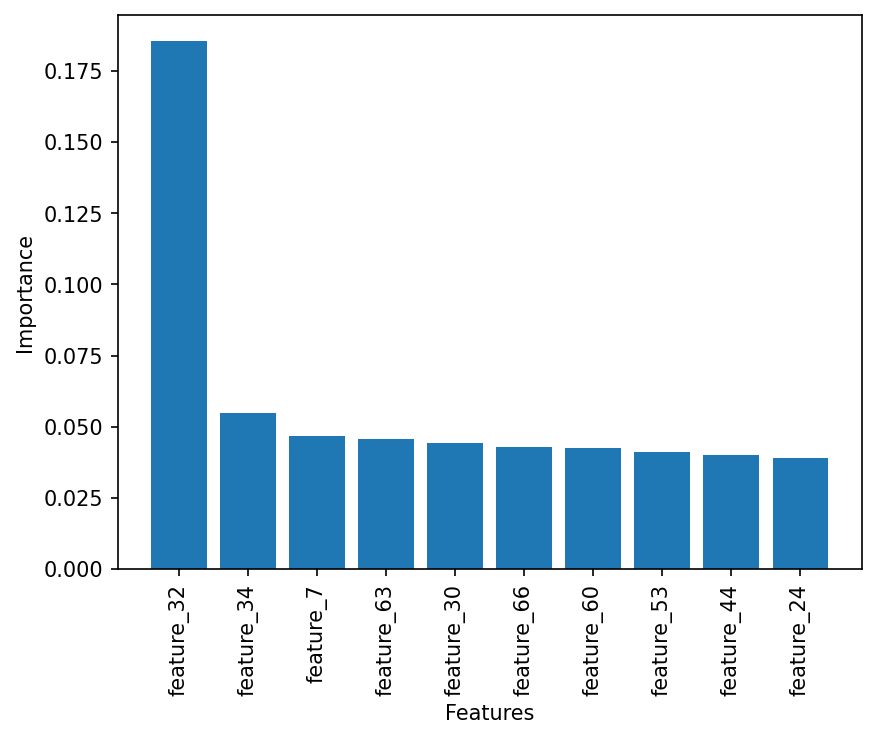

In [72]:
# Using the feature importance attribute of the random forest regressor to get the most important features

# Getting the feature importance
feature_importance = Rf.feature_importances_

# Sorting the feature importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Getting the names of the features
feature_names = df_one_hot.columns[1:]

fig = plt.figure(dpi = 150)

# Plotting the feature importance
plt.bar(feature_names[sorted_idx[:10]],feature_importance[sorted_idx[:10]])
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')

As can be seen, the most important feature or "sequence" predicted by the model is **feature 32**, we can look at the original features list to determine the sequence.

In [76]:
# Determining the sequence attached to the most important feature

sequence = all_features[sorted_idx[0]]

print("The most important sequence predicted by random forest is: ", sequence)

The most important sequence predicted by random forest is:  CCCTTAACCCTTAACCCTTAACCCTTAACCCTTAACCCTTAACCCTAAAC


Of course, there is a lot to do, like hyperparameter tuning or avoiding overfitting, but these things are done with the real data.